In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('American_Housing_Data_20231209.csv')

In [3]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [4]:
data['Median Household Income']=data['Median Household Income'].fillna(data['Median Household Income'].mean())

In [5]:
data.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [6]:
data=data.drop(['Address'],axis=1)

In [7]:
data.head()

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['State']=le.fit_transform(data['State']).astype(float)
data['City']=le.fit_transform(data['City']).astype(float)
data['County']=le.fit_transform(data['County']).astype(float)

In [9]:
data.head()

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,150.0,18.0,29563,20967.9,57.0,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,150.0,18.0,29563,20967.9,57.0,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,150.0,18.0,29815,23740.9,57.0,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,150.0,18.0,29815,23740.9,57.0,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,150.0,18.0,29815,23740.9,57.0,249880.0,40.73407,-74.00601


In [10]:
data=(data-data.mean())/data.std()

In [11]:
split=0.8
train_y=data['Median Household Income'][:int(split*len(data))]
train_x=data.drop('Median Household Income',axis=1)[:int(split*len(data))]

train_x=train_x.values
train_y=train_y.values

test_y=data['Median Household Income'][int(split*len(data)):]
test_x=data.drop('Median Household Income',axis=1)[int(split*len(data)):]

test_x=test_x.values
test_y=test_y.values

ones=np.ones((train_x.shape[0],1))
train_x=np.hstack((ones,train_x))

test_x=np.hstack((np.ones((test_x.shape[0],1)),test_x))

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(31984, 13) (31984,) (7997, 13) (7997,)


In [12]:
data.head()

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,-2.140201,3.565255,-0.895236,0.403183,0.054055,0.391232,0.504805,-0.437174,6.308507,0.413745,5.479188,0.963453,1.598541
1,-2.140201,3.565255,-0.895236,0.403183,0.054055,0.391232,0.504805,-0.437174,6.308507,0.413745,5.479188,0.963453,1.598541
2,-2.140162,1.084736,-1.659298,-1.108485,-0.977062,0.391232,0.504805,-0.423679,7.249600,0.413745,2.939104,0.966615,1.598455
3,-2.140162,0.144906,-0.131175,-0.352651,-0.300108,0.391232,0.504805,-0.423679,7.249600,0.413745,2.939104,0.966615,1.598455
4,-2.140162,0.503942,-1.659298,-1.108485,-1.074478,0.391232,0.504805,-0.423679,7.249600,0.413745,2.939104,0.966615,1.598455


In [13]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [14]:
def loss_function(x,y,theta):
    m=x.shape[0]
    y_=hypothesis(x,theta)
    return np.sum((y_-y)**2)/m

In [15]:
def gradient(x,y,theta):
    m,n=x.shape
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y_-y))
    return grad/m

In [16]:
def gradient_descent(x,y,learning_rate=0.03,max_steps=1000):
    m,n=x.shape
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_steps):
        e=loss_function(x,y,theta)
        error_list.append(e)
        grad=gradient(x,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list

In [17]:
theta,error_list=gradient_descent(train_x,train_y)

In [18]:
print(theta)

[-0.11558535 -0.09423829  0.2483895  -0.20985282  0.26694935  0.107775
  0.00550097  0.00242529 -0.11670983  0.09068514 -0.03321567 -0.03681627
 -0.08623926]


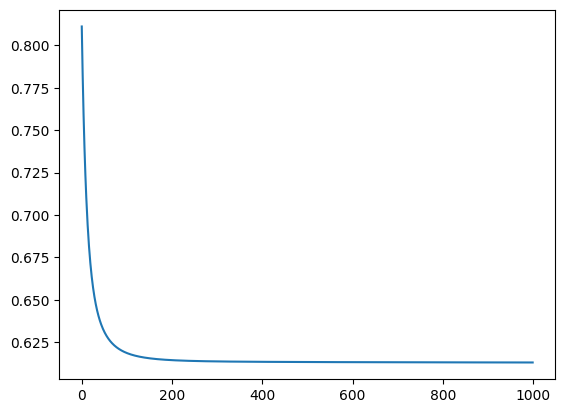

In [19]:
plt.plot(error_list)

In [20]:
y_pred=hypothesis(test_x,theta)

In [21]:
print(y_pred)

[-0.022577   -0.06601676 -0.07638047 ... -0.12374549 -0.34950267
  0.26038546]


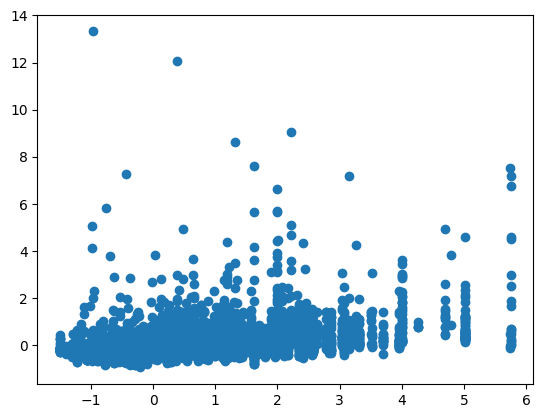

In [23]:
# predict 
plt.scatter(test_y,y_pred)

In [26]:
# test output vs predicted output
y_pred=hypothesis(train_x[20],theta)
print(y_pred,train_y[0])

-0.9234421760332412 5.47918828485984
